### Problem statement

**This project provides a comprehensive overview of various factors affecting student performance in exams. It includes information on study habits, attendance, parental involvement, and other aspects influencing academic success.**

## Data collection

**Dataset source:** https://www.kaggle.com/datasets/lainguyn123/student-performance-factors?select=StudentPerformanceFactors.csv



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data\StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [49]:
df.Gender.unique()


array(['Male', 'Female'], dtype=object)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [4]:
df.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


In [7]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [8]:
print('Categories in Parental_Involvement variable: ',end=" ")
print(df['Parental_Involvement'].unique())

print('Categories in Access_to_Resources variables: ',end=" ")
print(df['Access_to_Resources'].unique())

print('Categories in Extracurricular_Activities variables: ',end=" ")
print(df['Extracurricular_Activities'].unique())

print('Categories in Motivation_Level variables: ',end=" ")
print(df['Motivation_Level'].unique())

print('Categories in Internet_Access variables: ',end=" ")
print(df['Internet_Access'].unique())

print('Categories in Family_Income variables: ',end=" ")
print(df['Family_Income'].unique())

print('Categories in Teacher_Quality variables: ',end=" ")
print(df['Teacher_Quality'].unique())

print('Categories in School_Type variables: ',end=" ")
print(df['School_Type'].unique())

print('Categories in Peer_Influence variables: ',end=" ")
print(df['Peer_Influence'].unique())

print('Categories in Learning_Disabilities variables: ',end=" ")
print(df['Learning_Disabilities'].unique())

print('Categories in Parental_Education_Level variables: ',end=" ")
print(df['Parental_Education_Level'].unique())

print('Categories in Distance_from_Home variables: ',end=" ")
print(df['Distance_from_Home'].unique())

print('Categories in Gender variables: ',end=" ")
print(df['Gender'].unique())





Categories in Parental_Involvement variable:  ['Low' 'Medium' 'High']
Categories in Access_to_Resources variables:  ['High' 'Medium' 'Low']
Categories in Extracurricular_Activities variables:  ['No' 'Yes']
Categories in Motivation_Level variables:  ['Low' 'Medium' 'High']
Categories in Internet_Access variables:  ['Yes' 'No']
Categories in Family_Income variables:  ['Low' 'Medium' 'High']
Categories in Teacher_Quality variables:  ['Medium' 'High' 'Low' nan]
Categories in School_Type variables:  ['Public' 'Private']
Categories in Peer_Influence variables:  ['Positive' 'Negative' 'Neutral']
Categories in Learning_Disabilities variables:  ['No' 'Yes']
Categories in Parental_Education_Level variables:  ['High School' 'College' 'Postgraduate' nan]
Categories in Distance_from_Home variables:  ['Near' 'Moderate' 'Far' nan]
Categories in Gender variables:  ['Male' 'Female']


In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtype!='O']
categorical_features= [feature for feature in df.columns if df[feature].dtype=='O']

print(f'number of numerical columns {len(numerical_features)}: {numerical_features}')
print(f'number of categorical columns {len(categorical_features)}: {categorical_features}')

number of numerical columns 7: ['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score']
number of categorical columns 13: ['Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities', 'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level', 'Distance_from_Home', 'Gender']


In [10]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [11]:
df[df['Exam_Score']>=95]

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
94,18,89,High,Medium,Yes,4,73,Medium,Yes,3,High,Medium,Private,Positive,2,No,College,Near,Female,100
529,15,83,Medium,Medium,No,7,97,Medium,Yes,2,Low,High,Private,Neutral,2,No,High School,Near,Female,97
919,21,74,High,Medium,No,6,94,Medium,Yes,1,Low,High,Public,Positive,1,No,High School,Near,Male,97
1525,27,98,Low,Medium,Yes,6,93,Low,No,5,High,High,Public,Positive,3,No,High School,Moderate,Female,101
2425,23,83,High,High,Yes,4,89,Low,Yes,1,Medium,Medium,Public,Negative,3,No,High School,Far,Male,99
3457,18,93,Medium,Medium,No,7,76,Low,Yes,2,Medium,Medium,Private,Neutral,4,No,High School,Near,Female,96
3579,14,90,High,High,Yes,8,86,Medium,Yes,4,Medium,Medium,Private,Negative,2,No,High School,Near,Female,99
4192,28,90,Low,Medium,Yes,9,91,Medium,Yes,0,Medium,Medium,Public,Positive,2,No,College,Moderate,Female,98
4297,21,67,Medium,Medium,Yes,6,88,Medium,Yes,1,Low,Medium,Private,Positive,5,No,Postgraduate,Near,Female,95
5966,25,99,Medium,Medium,Yes,7,77,Medium,Yes,0,High,High,Public,Neutral,3,No,High School,Near,Male,97


In [12]:
df['Gender'].value_counts()

Gender
Male      3814
Female    2793
Name: count, dtype: int64

<Axes: xlabel='Exam_Score', ylabel='Count'>

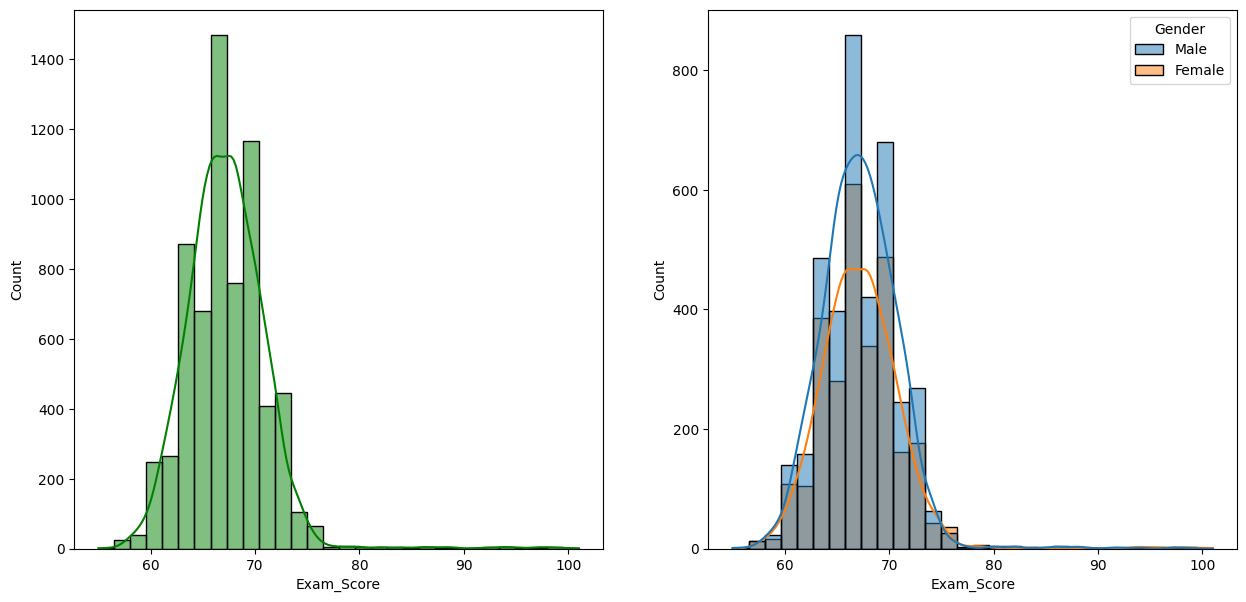

In [13]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Exam_Score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='Exam_Score',bins=30,kde=True,hue='Gender')

<Axes: xlabel='Exam_Score', ylabel='Count'>

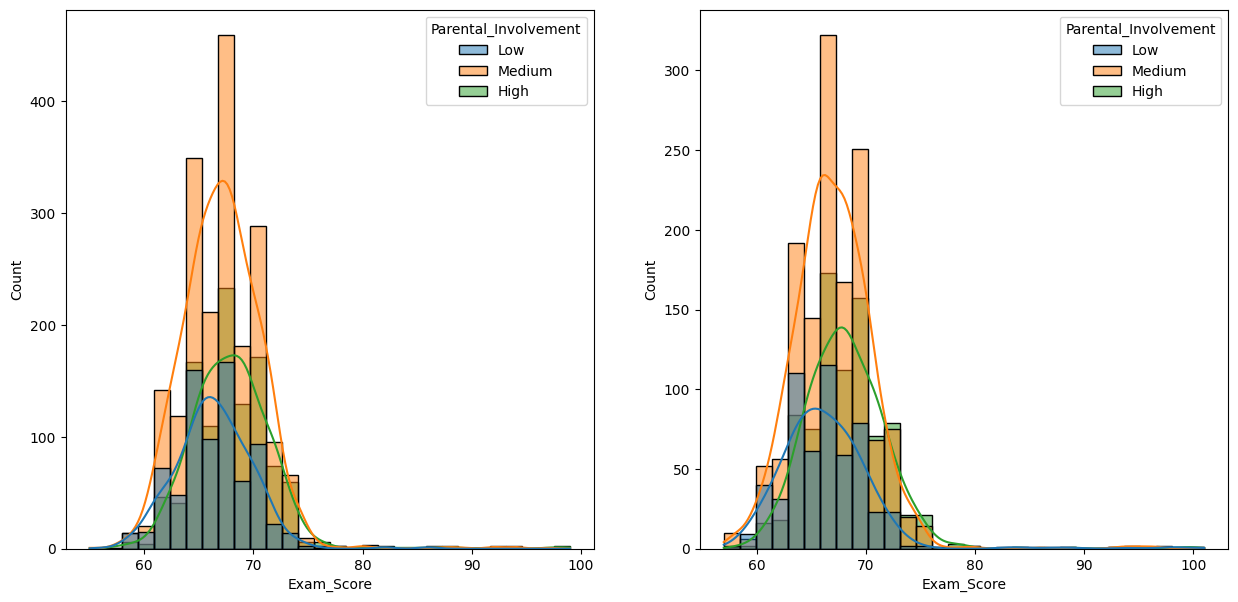

In [14]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='Exam_Score',bins=30,kde=True,hue='Parental_Involvement')
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='Exam_Score',bins=30,kde=True,hue='Parental_Involvement')

<Axes: xlabel='Exam_Score', ylabel='Count'>

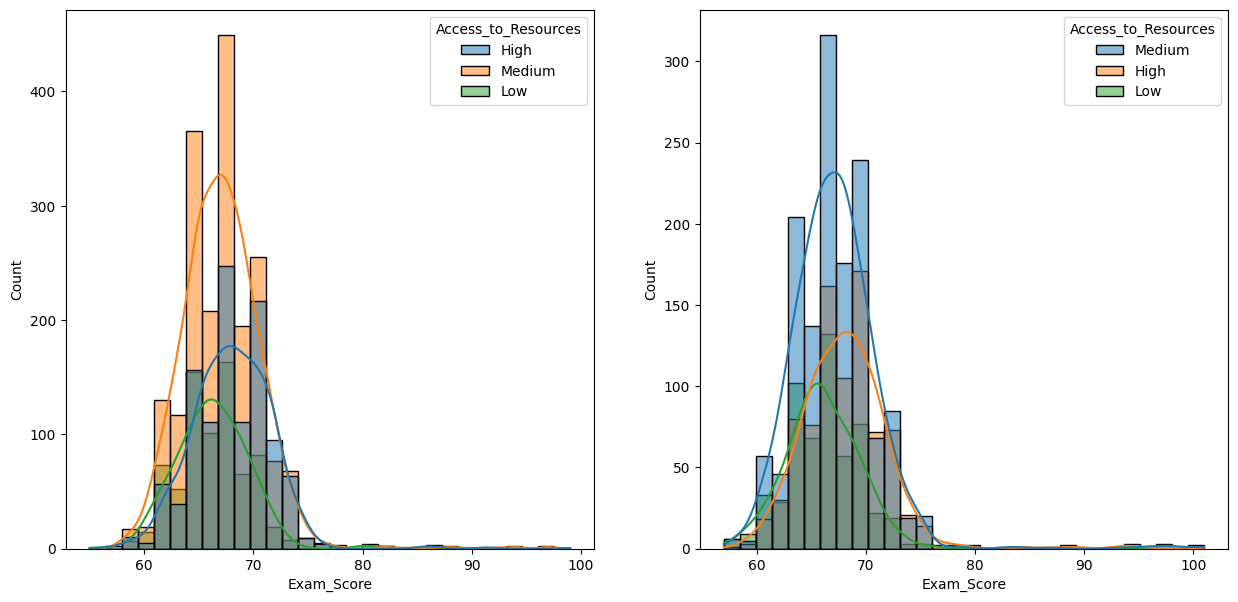

In [15]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='Exam_Score',bins=30,kde=True,hue='Access_to_Resources')
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='Exam_Score',bins=30,kde=True,hue='Access_to_Resources')

<Axes: xlabel='Exam_Score', ylabel='Count'>

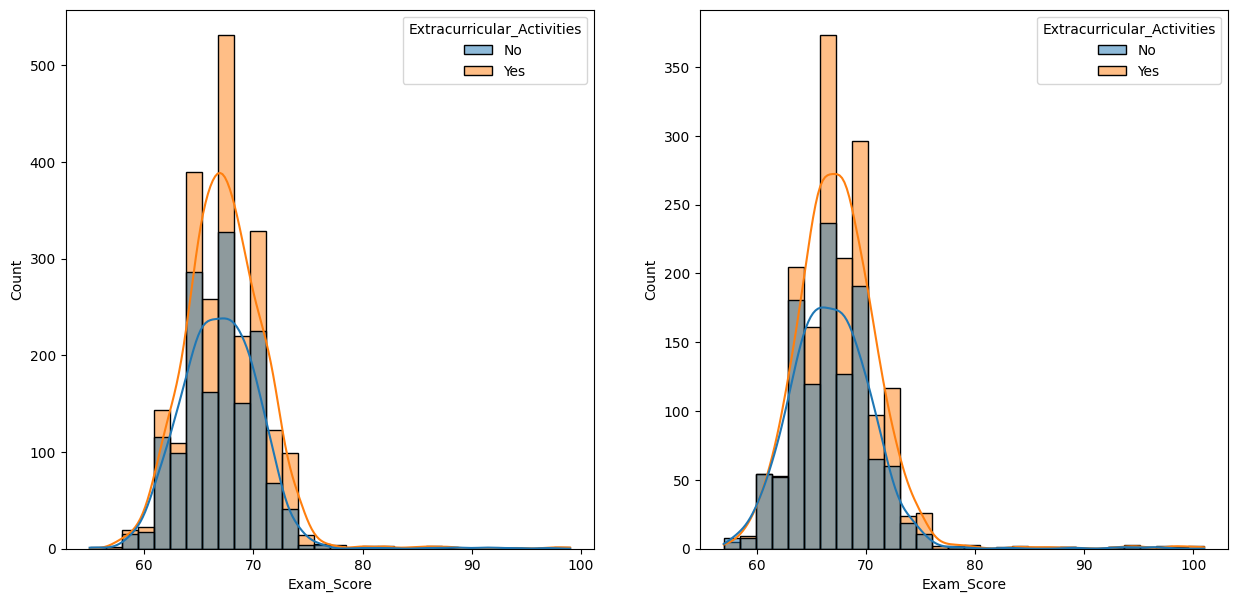

In [16]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='Exam_Score',bins=30,kde=True,hue='Extracurricular_Activities')
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='Exam_Score',bins=30,kde=True,hue='Extracurricular_Activities')

<Axes: xlabel='Exam_Score', ylabel='Count'>

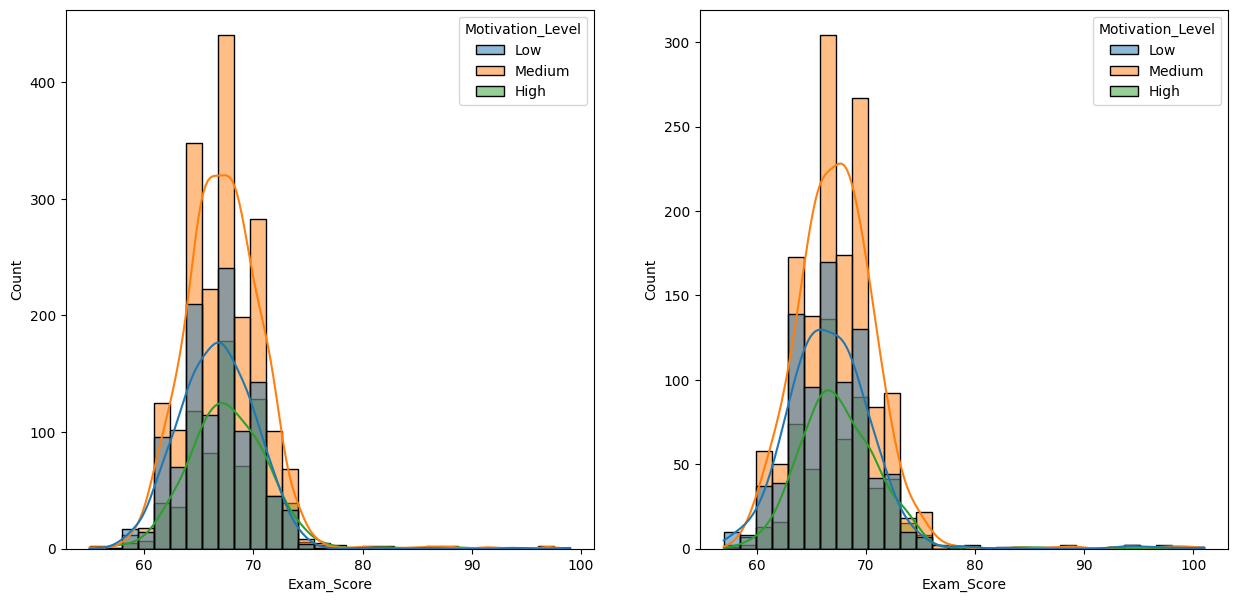

In [17]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='Exam_Score',bins=30,kde=True,hue='Motivation_Level')
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='Exam_Score',bins=30,kde=True,hue='Motivation_Level')

<Axes: xlabel='Exam_Score', ylabel='Count'>

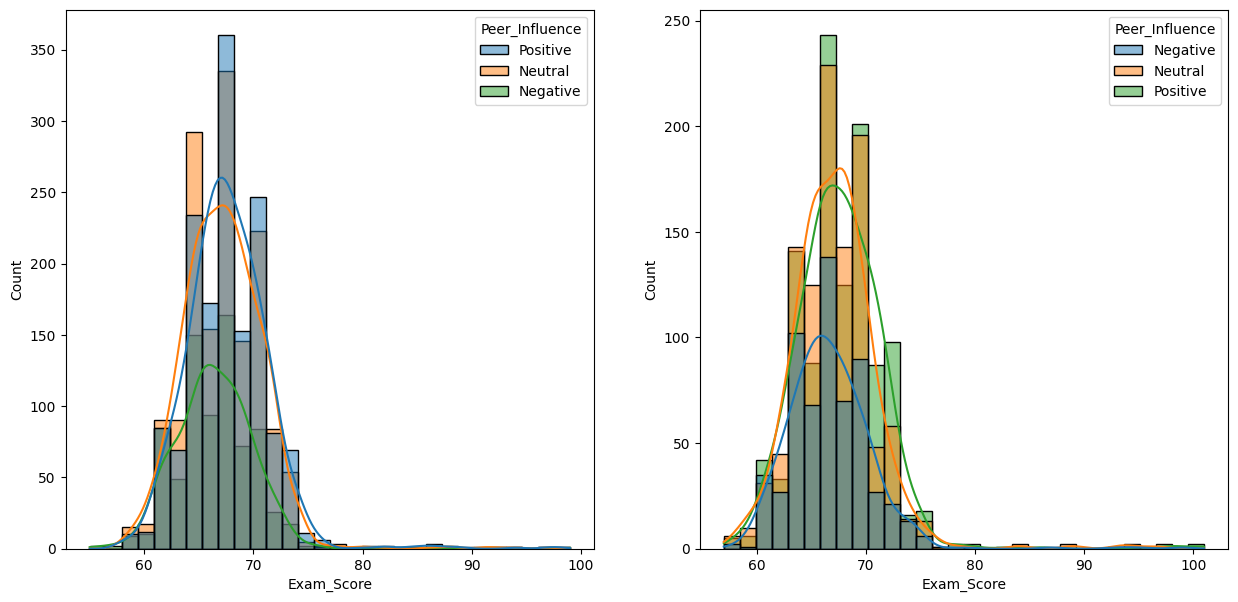

In [18]:
fig,ax= plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df[df.Gender=='Male'],x='Exam_Score',bins=30,kde=True,hue='Peer_Influence')
plt.subplot(122)
sns.histplot(data=df[df.Gender=='Female'],x='Exam_Score',bins=30,kde=True,hue='Peer_Influence')

In [19]:
numerical_corr=pd.DataFrame(data=df,columns=['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores', 'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'])
numerical_corr

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
0,23,84,7,73,0,3,67
1,19,64,8,59,2,4,61
2,24,98,7,91,2,4,74
3,29,89,8,98,1,4,71
4,19,92,6,65,3,4,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,1,2,68
6603,23,76,8,81,3,2,69
6604,20,90,6,65,3,2,68
6605,10,86,6,91,2,3,68


<Axes: >

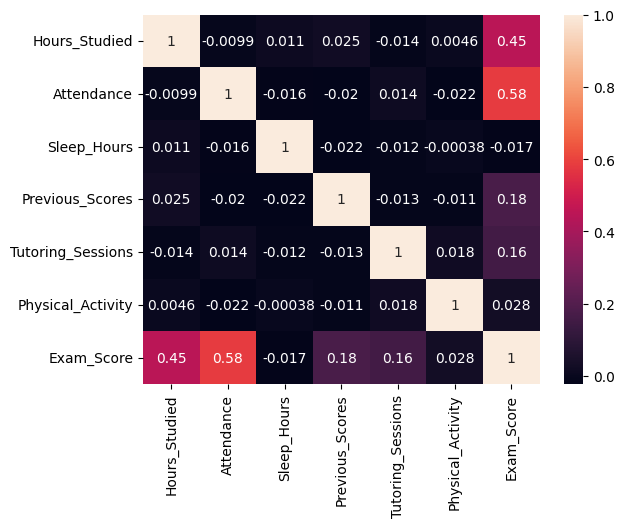

In [20]:
sns.heatmap(numerical_corr.corr(),annot=True)